In [1]:
import pandas as pd
file_path='Encounters.csv'
import datetime as dt

In [2]:
import dask.dataframe as dd
df = dd.read_csv(file_path)


In [3]:
df.head(5)

C:\Anaconda3\lib\site-packages\dask\local.py:252: DtypeWarning: Columns (8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  args2 = [_execute_task(a, cache) for a in args]


,PATIENT_ID,PROVIDER_IDS,PROVIDER_TYPES,CARE_SETTING_CATEGORY,ADMIT_DATE,DISCHARGE_DATE,DISCHARGE_DISPOSITION,OVERDOSE_FLAG,OD_DX_DATE,OD_NOTE_DATE,...,OTHERGOV_FLAG,SELFPAY_FLAG,WORKERSCOMP_FLAG,INSTITUTIONALIZED_FLAG,CHARITY_FLAG,MEDICARE_FLAG,MEDICAID_FLAG,LIFE_FLAG,MDWISE_FLAG,NODATA_FLAG
0,591002,NaN,NaN,E,2010-03-08,2010-03-09,NaN,0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,591002,NaN,NaN,E,2010-03-08,NaN,NaN,0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
2,591002,NaN,NaN,E,2010-03-12,2010-03-13,NaN,0,NaN,NaN,...,0,0,0,0,0,1,0,0,0,0
3,591002,NaN,NaN,E,2010-03-12,NaN,NaN,0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
4,591002,NaN,NaN,E,2010-12-28,2010-12-30,NaN,0,NaN,NaN,...,0,0,0,0,0,1,0,0,0,0


In [4]:
import pandas as pd 
j=[]
file_path='Encounters.csv'
chunksize=30000
d={}
for chunk in pd.read_csv(file_path, low_memory=False, iterator=True, chunksize=chunksize):
    a = chunk[['ADMIT_DATE', 'DISCHARGE_DATE', 'PATIENT_ID','CARE_SETTING_CATEGORY','DISCHARGE_DISPOSITION']]
    b = a[(a['ADMIT_DATE'].notnull()) & (a['ADMIT_DATE']>="2014-10-01") & (a['DISCHARGE_DATE'].notnull()) & (a['DISCHARGE_DATE']>="2014-10-01")]
    #b.reset_index(inplace=True)
    j.extend(b.values)

In [5]:
df_new = pd.DataFrame(j, columns=['ADMIT_DATE', 'DISCHARGE_DATE', 'PATIENT_ID','CARE_SETTING_CATEGORY','DISCHARGE_DISPOSITION'])

In [6]:
df_new=df_new.sort_values(by=['PATIENT_ID','ADMIT_DATE'])

In [7]:
df_new_uniq = pd.DataFrame.drop_duplicates(df_new)

In [8]:
df_new_uniq1 = pd.DataFrame.drop_duplicates(df_new)

In [9]:
df_new_uniq1.head()

,ADMIT_DATE,DISCHARGE_DATE,PATIENT_ID,CARE_SETTING_CATEGORY,DISCHARGE_DISPOSITION
1856652,2017-11-03,2017-11-03,1,E,Discharged to home or self care (routine disch...
1856653,2018-02-15,2018-02-15,1,E,Discharged to home or self care (routine disch...
11207650,2015-04-25,2015-04-26,2,O,Discharged to home or self care (routine disch...
11207651,2015-09-04,2015-09-05,2,O,Discharged to home or self care (routine disch...
11207652,2015-09-15,2015-09-16,2,O,Discharged to home or self care (routine disch...


# Total Unique Number of Patients in our Data Set---560845

In [10]:
df_new_uniq1['PATIENT_ID'].nunique()

560845

## Total Number of records---13012632

In [11]:
len(df_new_uniq1)

13012632

In [12]:
caetogory_care_setting=pd.get_dummies(df_new_uniq1.CARE_SETTING_CATEGORY, prefix='Category')

In [13]:
df_new_uniq2 = pd.concat([df_new_uniq1, caetogory_care_setting], axis=1)

In [14]:
col_E=df_new_uniq2.groupby(['PATIENT_ID'], as_index=False)['Category_E'].sum()

In [15]:
Col_Inew_df=df_new_uniq2.groupby(['PATIENT_ID'], as_index=False)['Category_I'].sum()

In [16]:
final_df=pd.concat([col_E, Col_Inew_df['Category_I']], axis=1)

In [17]:
final_df.Category_E=final_df.Category_E.astype(int)

# Visit count Per Patient in Category E and I

In [18]:
final_df

,PATIENT_ID,Category_E,Category_I
0,1,2,0
1,2,0,0
2,3,2,1
3,5,0,0
4,7,0,0
5,9,1,1
6,10,2,1
7,11,2,0
8,12,2,0
9,13,6,0


# Patient with maximum number of Visits in E category
### Patient_id -- 243532 has visited in E category for 614 times

In [19]:
final_df.loc[final_df['Category_E'].idxmax()]

PATIENT_ID    243532
Category_E       614
Category_I         7
Name: 206138, dtype: int64

### Patients with zero visits in E

In [20]:
final_df[final_df['Category_E']==0]

,PATIENT_ID,Category_E,Category_I
1,2,0,0
3,5,0,0
4,7,0,0
11,15,0,0
18,25,0,0
25,34,0,0
30,39,0,0
32,42,0,0
33,44,0,0
37,50,0,0


# Mean Number of Visits in E category--2.8371

In [25]:
final_df['Category_E'].mean()

2.8371189900953024

In [26]:
final_df['Category_E'].median()

1.0

In [23]:
final_df['Category_E'].std()

6.60342428184891

In [24]:
### Number of Patient_id with visits more than mean visits in E Category

In [27]:
len(final_df.loc[final_df['Category_E'] > final_df['Category_E'].mean(), 'PATIENT_ID'])

165866

In [28]:
import seaborn as sns

## Explanation of Care Setting Category

In [29]:
df1=df_new_uniq1['CARE_SETTING_CATEGORY'].value_counts()

In [30]:
df1

O    10799752
E     1591184
I      621696
Name: CARE_SETTING_CATEGORY, dtype: int64

In [31]:
y = pd.get_dummies(df_new_uniq1,columns = ['CARE_SETTING_CATEGORY'])
k_df=y.groupby(['PATIENT_ID']).sum()
k_df=k_df.reset_index()

In [32]:
k_df=y.groupby(['PATIENT_ID']).sum()
k_df=k_df.reset_index()

In [33]:
df_e_b=df_new_uniq[df_new_uniq1['CARE_SETTING_CATEGORY']=='E']
df_i_b=df_new_uniq[df_new_uniq1['CARE_SETTING_CATEGORY']=='I']
df_o_b=df_new_uniq[df_new_uniq1['CARE_SETTING_CATEGORY']=='O']

### Total Records of E-Category---1591184

In [34]:
len(df_e_b)

1591184

### Unique patients in E ----356206

In [35]:
patient_list_E=df_e_b['PATIENT_ID'].tolist()

In [36]:
len(set(patient_list_E))

356206

### Ouliers in E-Category

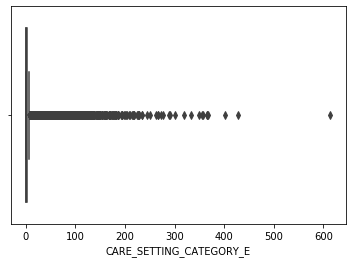

In [37]:
sns.boxplot(x=k_df['CARE_SETTING_CATEGORY_E'])

### Total Records of I-Category---621696

In [38]:
len(df_i_b)

621696

### Unique patients in I--222274

In [39]:
patient_list_I=df_i_b['PATIENT_ID'].tolist()
len(set(patient_list_I))

222274

### Ouliers in I-Category

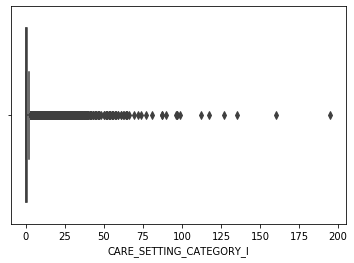

In [40]:
sns.boxplot(x=k_df['CARE_SETTING_CATEGORY_I'])

### Total Records of O-Category---10799752

In [41]:
len(df_o_b)

10799752

### Unique patients in O---530743

In [42]:
patient_list_O=df_o_b['PATIENT_ID'].tolist()
len(set(patient_list_O))

530743

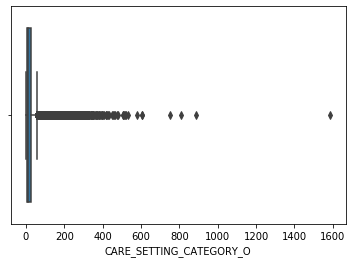

In [43]:
sns.boxplot(x=k_df['CARE_SETTING_CATEGORY_O'])

# Care Setting Category after changes

In [44]:
df_new_uniq1.head()

,ADMIT_DATE,DISCHARGE_DATE,PATIENT_ID,CARE_SETTING_CATEGORY,DISCHARGE_DISPOSITION
1856652,2017-11-03,2017-11-03,1,E,Discharged to home or self care (routine disch...
1856653,2018-02-15,2018-02-15,1,E,Discharged to home or self care (routine disch...
11207650,2015-04-25,2015-04-26,2,O,Discharged to home or self care (routine disch...
11207651,2015-09-04,2015-09-05,2,O,Discharged to home or self care (routine disch...
11207652,2015-09-15,2015-09-16,2,O,Discharged to home or self care (routine disch...


In [48]:
df_new_uniq3=df_new_uniq1.filter(['ADMIT_DATE','DISCHARGE_DATE','PATIENT_ID','CARE_SETTING_CATEGORY'], axis=1)

## COUNT OF E before dropping duplicates was--1591184

In [49]:
df_e=df_new_uniq3[df_new_uniq3['CARE_SETTING_CATEGORY']=='E']
df_i=df_new_uniq3[df_new_uniq3['CARE_SETTING_CATEGORY']=='I']

In [50]:
len(df_e)

1591184

### Number of Patients merged from E to I as they were duplicates in both I and E category

In [51]:
df_i_2 = pd.merge(df_i, df_e, on=['ADMIT_DATE', 'DISCHARGE_DATE', 'PATIENT_ID'], how='inner')

In [52]:
df_i_2

,ADMIT_DATE,DISCHARGE_DATE,PATIENT_ID,CARE_SETTING_CATEGORY_x,CARE_SETTING_CATEGORY_y
0,2015-07-30,2015-08-01,82,I,E
1,2018-09-06,2018-09-06,86,I,E
2,2015-06-30,2015-07-05,93,I,E
3,2016-10-23,2016-11-03,93,I,E
4,2017-05-22,2017-05-24,93,I,E
5,2018-10-25,2018-10-27,109,I,E
6,2015-04-14,2015-04-18,117,I,E
7,2016-02-04,2016-02-07,259,I,E
8,2016-09-26,2016-10-17,273,I,E
9,2018-04-17,2018-04-17,326,I,E


In [53]:
df_i_3 = df_i_2[['ADMIT_DATE','DISCHARGE_DATE','PATIENT_ID','CARE_SETTING_CATEGORY_y']]

In [54]:
df_i_3.columns = ['ADMIT_DATE','DISCHARGE_DATE','PATIENT_ID','CARE_SETTING_CATEGORY']
df_i_3

,ADMIT_DATE,DISCHARGE_DATE,PATIENT_ID,CARE_SETTING_CATEGORY
0,2015-07-30,2015-08-01,82,E
1,2018-09-06,2018-09-06,86,E
2,2015-06-30,2015-07-05,93,E
3,2016-10-23,2016-11-03,93,E
4,2017-05-22,2017-05-24,93,E
5,2018-10-25,2018-10-27,109,E
6,2015-04-14,2015-04-18,117,E
7,2016-02-04,2016-02-07,259,E
8,2016-09-26,2016-10-17,273,E
9,2018-04-17,2018-04-17,326,E


In [55]:
df_e_final=df_e[~df_e.isin(df_i_3)].dropna()

### Count of E after dropping duplicates --- 1590536

In [56]:
len(df_e_final)

1590536

In [57]:
result=df_e_final.append(df_i)

In [58]:
df_new_sort=result.sort_values(['PATIENT_ID', 'ADMIT_DATE', 'DISCHARGE_DATE'])[['PATIENT_ID', 'ADMIT_DATE', 'DISCHARGE_DATE','CARE_SETTING_CATEGORY']]


In [59]:
df_new_sort.head()

,PATIENT_ID,ADMIT_DATE,DISCHARGE_DATE,CARE_SETTING_CATEGORY
1856652,1,2017-11-03,2017-11-03,E
1856653,1,2018-02-15,2018-02-15,E
1104670,3,2017-08-18,2017-08-18,E
1104672,3,2017-08-20,2017-10-14,I
1104671,3,2018-02-10,2018-02-10,E


In [60]:
df_new_sort['ADMIT_DATE'] =  pd.to_datetime(df_new_sort['ADMIT_DATE'])
df_new_sort['DISCHARGE_DATE'] =  pd.to_datetime(df_new_sort['DISCHARGE_DATE'])


In [61]:
df_new_sort['grp_date'] = df_new_sort.ADMIT_DATE.diff().dt.days.ne(1).cumsum()

In [62]:
idxmin = df_new_sort.loc[df_new_sort.groupby(["grp_date"])["ADMIT_DATE"].idxmin()]

In [63]:
idxmax = df_new_sort.loc[df_new_sort.groupby(["grp_date"])["DISCHARGE_DATE"].idxmax()]

In [64]:
idx =  pd.merge(idxmin, idxmax, on=['grp_date'], how='inner')

In [65]:
final = idx[['PATIENT_ID_x', 'ADMIT_DATE_x', 'DISCHARGE_DATE_y','CARE_SETTING_CATEGORY_x']]

# Final Data After modifications

In [66]:
final.rename(columns={'PATIENT_ID_x':'PATIENT_ID', 'ADMIT_DATE_x':'ADMIT_DATE','DISCHARGE_DATE_y':'DISCHARGE_DATE','CARE_SETTING_CATEGORY_x':'CARE_SETTING_CATEGORY'}, inplace=True)

C:\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [67]:
final.head()

,PATIENT_ID,ADMIT_DATE,DISCHARGE_DATE,CARE_SETTING_CATEGORY
0,1,2017-11-03,2017-11-03,E
1,1,2018-02-15,2018-02-15,E
2,3,2017-08-18,2017-08-18,E
3,3,2017-08-20,2017-10-14,I
4,3,2018-02-10,2018-02-10,E


In [103]:
final.to_csv('output.csv')

How many visit each patient had in each category---dummy e.g. how many visits olena has in O,E,I Categories

### Care Setting Category -E After Modification

In [68]:
#df_new_uniq.head(5)
cateogory_care_setting=pd.get_dummies(final.CARE_SETTING_CATEGORY, prefix='Category')

In [69]:
df_E_new = pd.concat([final, cateogory_care_setting], axis=1)

In [70]:
category_E=df_E_new.groupby(['PATIENT_ID'], as_index=False)['Category_E'].sum()

In [71]:
category_I=df_E_new.groupby(['PATIENT_ID'], as_index=False)['Category_I'].sum()

In [72]:
final_df_ch=pd.concat([category_E, category_I['Category_I']], axis=1)

In [73]:
final_df_ch.Category_E=final_df_ch.Category_E.astype(int)

In [74]:
final_df_ch.Category_I=final_df_ch.Category_I.astype(int)

In [75]:
final_df_ch.PATIENT_ID=final_df_ch.PATIENT_ID.astype(int)

### FINAL  Visit count Per Patient in Category E and I

In [76]:
final_df_ch.head(1000)

,PATIENT_ID,Category_E,Category_I
0,1,2,0
1,3,2,1
2,9,1,1
3,10,2,1
4,11,2,0
5,12,2,0
6,13,5,0
7,14,2,0
8,16,1,0
9,17,2,1


### Patient with Maximum visit in E Category--- 303 times

In [77]:
final_df_ch.loc[final_df_ch['Category_E'].idxmax()]

PATIENT_ID    99206
Category_E      303
Category_I        0
Name: 61816, dtype: int32

### Patient id with zero visits in Category E

In [78]:
final_df_ch[final_df_ch['Category_E']==0]

,PATIENT_ID,Category_E,Category_I
31,54,0,1
38,72,0,1
42,79,0,1
44,81,0,1
52,92,0,1
54,95,0,2
57,98,0,1
59,102,0,1
69,119,0,1
76,136,0,1


## Mean number of visits for E Category--3.635

In [79]:
final_df_ch['Category_E'].mean()

3.6386808445806236

### Median number of visits for E Category-- 2.0

In [80]:
final_df_ch['Category_E'].median()

2.0

In [81]:
final_df_ch['Category_E'].std()

6.555384393354021

###  Number of Patient_id with visits more than mean visits in E Category---117684

In [82]:
len(final_df_ch.loc[final_df_ch['Category_E'] > final_df_ch['Category_E'].mean(), 'PATIENT_ID'])

117684

### Distribution in E AND I Category

In [83]:
final['CARE_SETTING_CATEGORY'].value_counts()

E    1504620
I     541672
Name: CARE_SETTING_CATEGORY, dtype: int64

In [84]:
df_e_a=final[final['CARE_SETTING_CATEGORY']=='E']
df_i_a=final[final['CARE_SETTING_CATEGORY']=='I']

In [85]:
len(df_e_a)

1504620

In [86]:
patient_list_E=df_e_a['PATIENT_ID'].tolist()
len(set(patient_list_E))

355792

In [88]:
import numpy as np


### Patient_id outliers in E Category--count--6456

In [92]:
z=np.abs(stats.zscore(final_df_ch['Category_E']))
k=np.where(z > 3)
k1=k[0]

l1=set(k1)
len(l1)

6456

In [93]:
y1 = pd.get_dummies(final,columns = ['CARE_SETTING_CATEGORY'])
k_df1=y1.groupby(['PATIENT_ID']).sum()
k_df1=k_df1.reset_index()

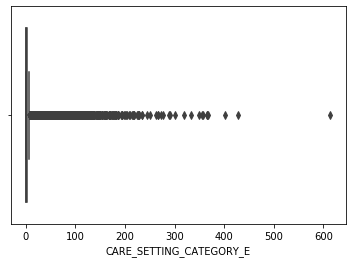

In [94]:
sns.boxplot(x=k_df['CARE_SETTING_CATEGORY_E'])

### Mean number of visits for I Category-- 1.309

In [95]:
final_df_ch['Category_I'].mean()

1.3099463854299926

### Median number of visits for I Category-- 2.0

In [96]:
final_df_ch['Category_I'].median()

1.0

In [97]:
final_df_ch['Category_I'].std()

2.407368750769541

### Number of Patient_id with visits more than mean visits in I Category---112299

In [98]:
len(final_df_ch.loc[final_df_ch['Category_I'] > final_df_ch['Category_I'].mean(), 'PATIENT_ID'])

112299

### Patient_id with Outliers in I Category 

In [99]:
import numpy as np
from scipy import stats

In [100]:
z=np.abs(stats.zscore(final_df_ch['Category_I']))
k=np.where(z > 3)

### 7465 Outliers in I category

In [101]:

k1=k[0]

l1=set(k1)
len(l1)

7465

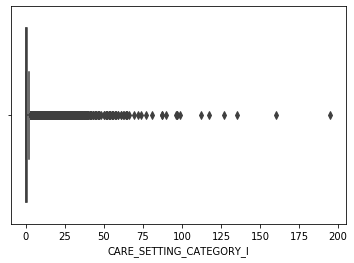

In [102]:
sns.boxplot(x=k_df['CARE_SETTING_CATEGORY_I'])